In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Using pro-football-reference 2023 Fantasy Football Data
# https://www.pro-football-reference.com/years/2023/fantasy.htm

In [4]:
df = pd.read_csv(r'2023.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2',
       'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', '-9999'],
      dtype='object')

In [5]:
#Data Cleaning

#Dropping unneccessary columns

df.drop(['Rk', '2PM', '2PP', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

In [6]:
df

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3,FantPt,-9999
0,Christian McCaffrey*+,SFO,RB,27,16,0,0,0,0,0,272,1459,5.36,14,83,67,564,8.42,7,2,21,324.0,McCaCh01
1,CeeDee Lamb*+,DAL,WR,24,17,0,0,0,0,0,14,113,8.07,2,181,135,1749,12.96,12,2,14,268.0,LambCe00
2,Josh Allen,BUF,QB,27,17,385,579,4306,29,18,111,524,4.72,15,0,0,0,NaN,0,4,15,393.0,AlleJo02
3,Tyreek Hill*+,MIA,WR,29,16,0,0,0,0,0,6,15,2.50,0,171,119,1799,15.12,13,1,13,257.0,HillTy00
4,Jalen Hurts*,PHI,QB,25,17,352,538,3858,23,15,157,605,3.85,15,0,0,0,NaN,0,5,15,357.0,HurtJa00
5,Raheem Mostert*,MIA,RB,31,15,0,0,0,0,0,209,1012,4.84,18,32,25,175,7.00,3,1,21,243.0,MostRa00
6,Amon-Ra St. Brown*+,DET,WR,24,16,0,0,0,0,0,4,24,6.00,0,164,119,1515,12.73,10,1,10,212.0,StxxAm00
7,Dak Prescott*,DAL,QB,30,17,410,590,4516,36,9,55,242,4.40,2,0,0,0,NaN,0,2,2,343.0,PresDa01
8,Mike Evans*,TAM,WR,30,17,0,0,0,0,0,0,0,NaN,0,136,79,1255,15.89,13,0,13,204.0,EvanMi00
9,Lamar Jackson*+,BAL,QB,26,16,307,457,3678,24,7,148,821,5.55,5,0,0,0,NaN,0,6,5,331.0,JackLa00


In [7]:
# Reformating the Player name column to remove  
# the * and + sometimes found after the player's name using a Lambda function

df['Player'] = df['Player'].apply(lambda x: x.split('*')[0])

In [8]:
df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3,FantPt,-9999
0,Christian McCaffrey,SFO,RB,27,16,0,0,0,0,0,272,1459,5.36,14,83,67,564,8.42,7,2,21,324.0,McCaCh01
1,CeeDee Lamb,DAL,WR,24,17,0,0,0,0,0,14,113,8.07,2,181,135,1749,12.96,12,2,14,268.0,LambCe00
2,Josh Allen,BUF,QB,27,17,385,579,4306,29,18,111,524,4.72,15,0,0,0,NaN,0,4,15,393.0,AlleJo02
3,Tyreek Hill,MIA,WR,29,16,0,0,0,0,0,6,15,2.50,0,171,119,1799,15.12,13,1,13,257.0,HillTy00
4,Jalen Hurts,PHI,QB,25,17,352,538,3858,23,15,157,605,3.85,15,0,0,0,NaN,0,5,15,357.0,HurtJa00


In [9]:
#Renaming cryptic values like TD, TD.1, TD.2, etc...

df.rename({
'TD': 'PassingTD',
'TD.1': 'RushingTD',
'TD.2': 'ReceivingTD',
'TD.3': 'TotalTD',
'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)


In [10]:
df.columns

Index(['Player', 'Tm', 'FantPos', 'Age', 'G', 'Cmp', 'PassingAtt',
       'PassingYDs', 'PassingTD', 'Int', 'RushingAtt', 'RushingYDs', 'Y/A',
       'RushingTD', 'Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD', 'FL',
       'TotalTD', 'FantPt', '-9999'],
      dtype='object')

In [11]:
#Creating a separate DF for each position

rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

In [12]:
# We can now assign relevant columns to the appropriate Dataframe
#For example, we don't want to measure passing statistics for wide receivers or runningbacks

rushingGroup = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receivingGroup = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passingGroup = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int', 'FantPt']

def transformColumns(df, newColumnList):
    df = df[['Player', 'Tm', 'Age', 'G'] + newColumnList + ['FL']]
    return df

In [13]:
rb_df = transformColumns(rb_df, rushingGroup+receivingGroup)
wr_df = transformColumns(wr_df, rushingGroup+receivingGroup)
te_df = transformColumns(te_df, receivingGroup)
qb_df = transformColumns(qb_df, rushingGroup+passingGroup)

In [32]:
qb_df

,Player,Tm,Age,G,RushingAtt,RushingYDs,Y/A,RushingTD,PassingAtt,PassingYDs,PassingTD,Int,FantPt,FL
2,Josh Allen,BUF,27,17,111,524,4.72,15,579,4306,29,18,393.0,4
4,Jalen Hurts,PHI,25,17,157,605,3.85,15,538,3858,23,15,357.0,5
7,Dak Prescott,DAL,30,17,55,242,4.40,2,590,4516,36,9,343.0,2
9,Lamar Jackson,BAL,26,16,148,821,5.55,5,457,3678,24,7,331.0,6
17,Jordan Love,GNB,25,17,50,247,4.94,4,579,4159,32,11,319.0,3
30,Brock Purdy,SFO,24,16,39,144,3.69,2,444,4280,31,11,296.0,2
39,Jared Goff,DET,29,17,32,21,0.66,2,605,4575,30,12,289.0,4
49,Patrick Mahomes,KAN,28,16,75,389,5.19,0,597,4183,27,14,280.0,3
57,C.J. Stroud,HOU,22,15,39,167,4.28,3,499,4108,23,5,275.0,4
59,Baker Mayfield,TAM,28,17,62,163,2.63,1,566,4044,28,10,274.0,3


In [15]:
# I want to first take a look at the most important position 
# in football and the position that holds the most weight in Fantasy Football scoring - The Quarterback.
# The question: Is it better to select a "running Quarterback"? In other words, a quarterback that relies on his feet
# as much as he relies on his arm. 

#Since 2019, the overall QB1 in Fantasy Football has scored at least 4 rushing TDs and run for at least 350 yards every year

In [37]:
#To help eliminate Outliers, we want to only look at starting QBs, these are usually QBs that play 75%
# of games in the regular season, as injuries will sideline most players for 3-4 games. 

qb_df_new = qb_df[qb_df['G'] >= 13]

Text(0.5, 1.0, 'Quarterback Rushing Yds vs Total Fantasy Pts')

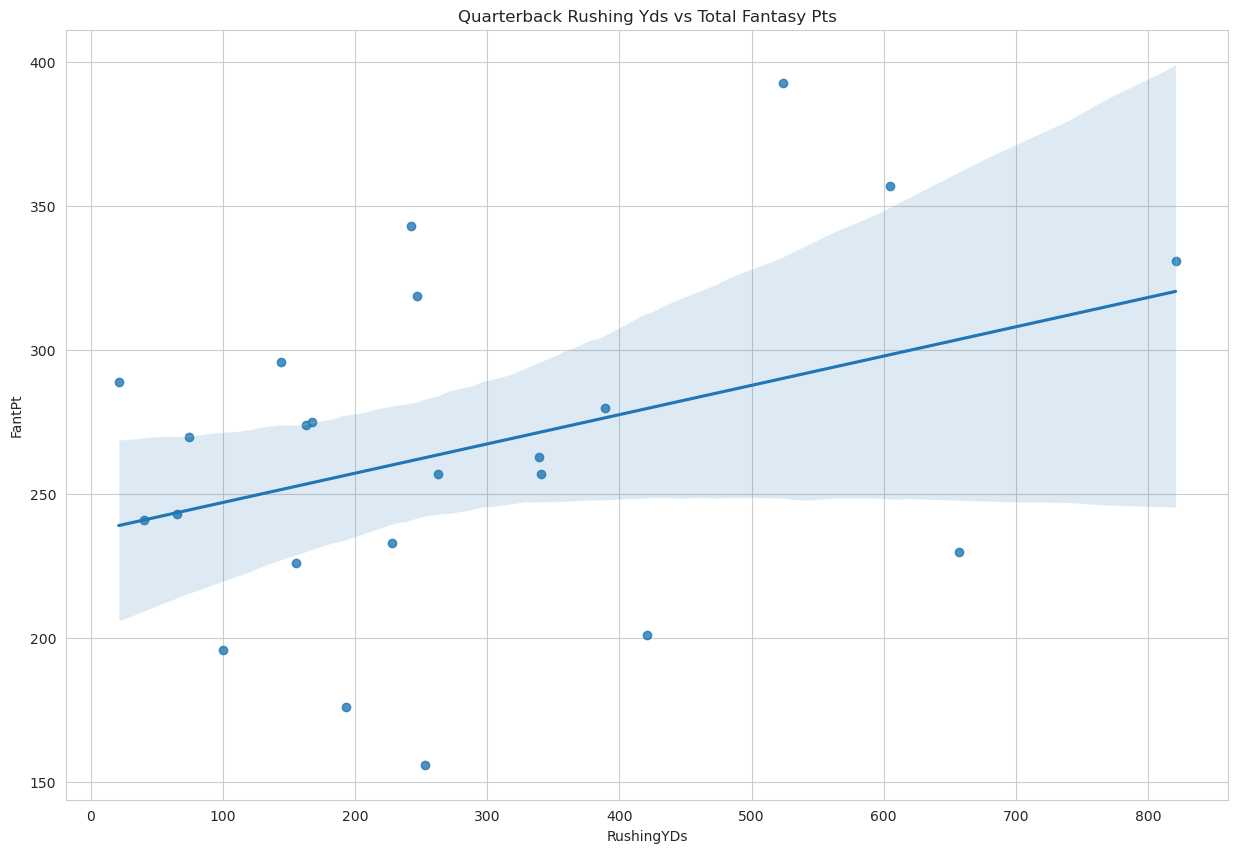

In [48]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

plot = sns.regplot(
x=qb_df_new['RushingYDs'],
y=qb_df_new['FantPt'],
scatter=True,)

plt.title('Quarterback Rushing Yds vs Total Fantasy Pts', fontdict=None, loc='center', pad=None)

In [51]:
#The data shows weaker correlation between the amount of Rushing Yards by a QB and their total fantasy points throughout the season. 
#At first glance, we see QB's scoring 250+ Fantasy Points at all sorts of ranges of Rushing Yards. 
#This suggests that last years QBs class went against the historical norm of rushing QBs leading fantasy scoring.

In [ ]:
#Next we will take a look at the running back position to gauge what qualities result in higher fantasy points being scored

In [41]:
#Calculating fantasy points scored in a full PPR league

rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] 
+ rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2

0      94.4
5      33.5
11     53.6
12     34.6
15     21.4
16     55.6
18     83.1
23     68.9
31      9.7
34     35.6
36     64.5
37     66.7
42     48.0
51     28.5
52     14.0
58     31.9
60     34.4
62     29.1
63     59.9
64     15.0
68     35.7
70     56.8
72     25.4
86     52.6
91     23.3
92     27.6
94     31.2
95     19.3
96     21.3
97     33.0
98     41.6
99     32.8
105    41.3
107    25.3
116    21.8
118    27.3
121     8.4
122    33.2
125    44.5
128    22.3
132    17.4
143    24.6
145    15.9
146    13.7
148    46.9
155    26.4
156    28.0
161    20.9
169    41.5
171    10.1
175    20.9
177    16.3
180    11.9
191     9.3
193    11.4
196    43.2
198     7.8
207     1.2
209    24.8
212    11.9
224     1.3
230     6.2
231     3.1
233     1.4
238    21.6
246     2.7
254     7.0
259    -0.8
262    16.1
263    10.3
268    11.7
274     8.8
281     9.8
285    14.8
289     8.5
292     8.1
299     3.8
303    14.0
304    12.2
306     3.7
309     0.7
319     4.9
325    13.1
326 

In [42]:
#Create new column for Fantasy points per game.
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

In [43]:
#Create new column for usage per game. Usage is defined as # of targets + carries
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']

#round each row value to two decimal places
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

Text(0.5, 1.0, 'Running Back Usage vs Fantasy Pts/Game')

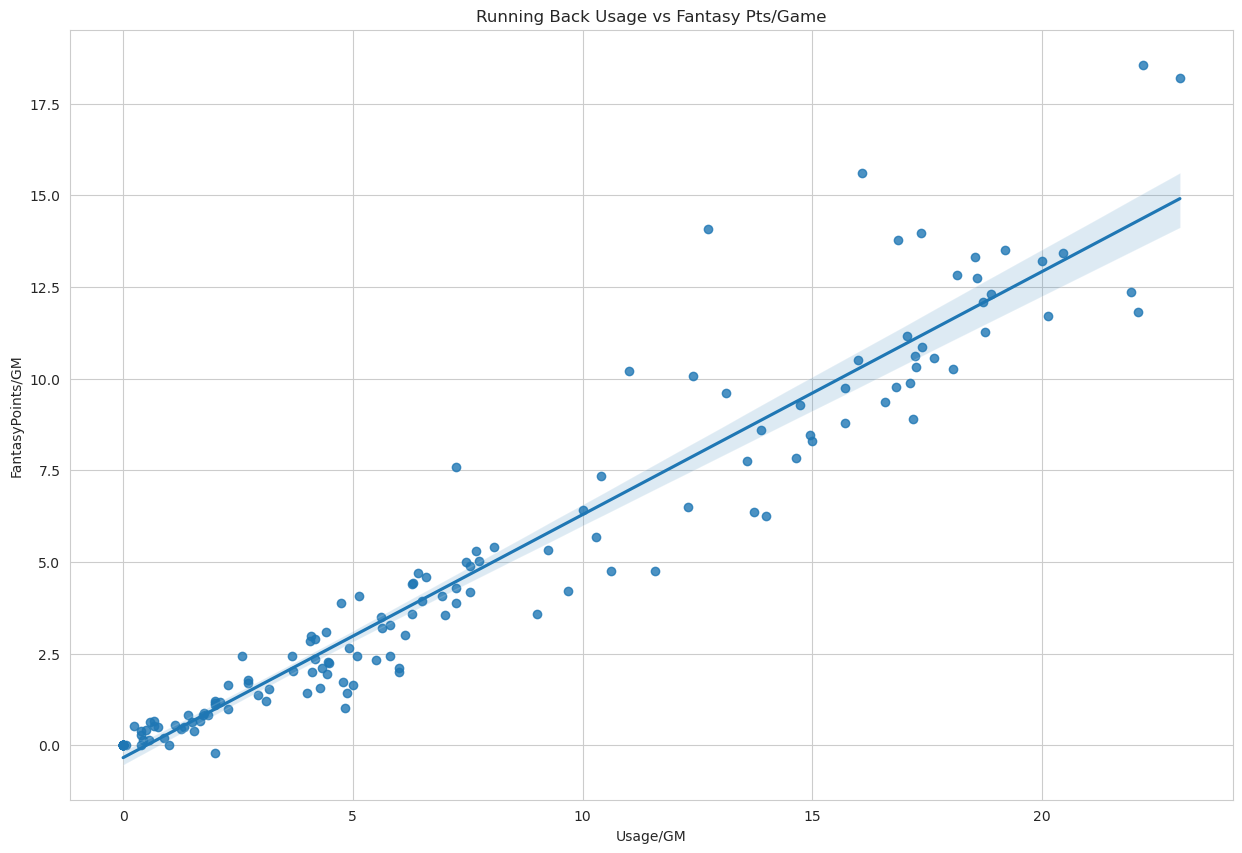

In [50]:
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=rb_df['Usage/GM'],
y=rb_df['FantasyPoints/GM'],
scatter=True,)

plt.title('Running Back Usage vs Fantasy Pts/Game', fontdict=None, loc='center', pad=None)

In [ ]:
#As we see in this regression plot, a Running Back's usage is HIGHLY correlated with their fantasy points. 
#In short, we want a running back that is getting the ball often

Text(0.5, 1.0, 'Running Back Efficiency vs Fantasy Pts/Game')

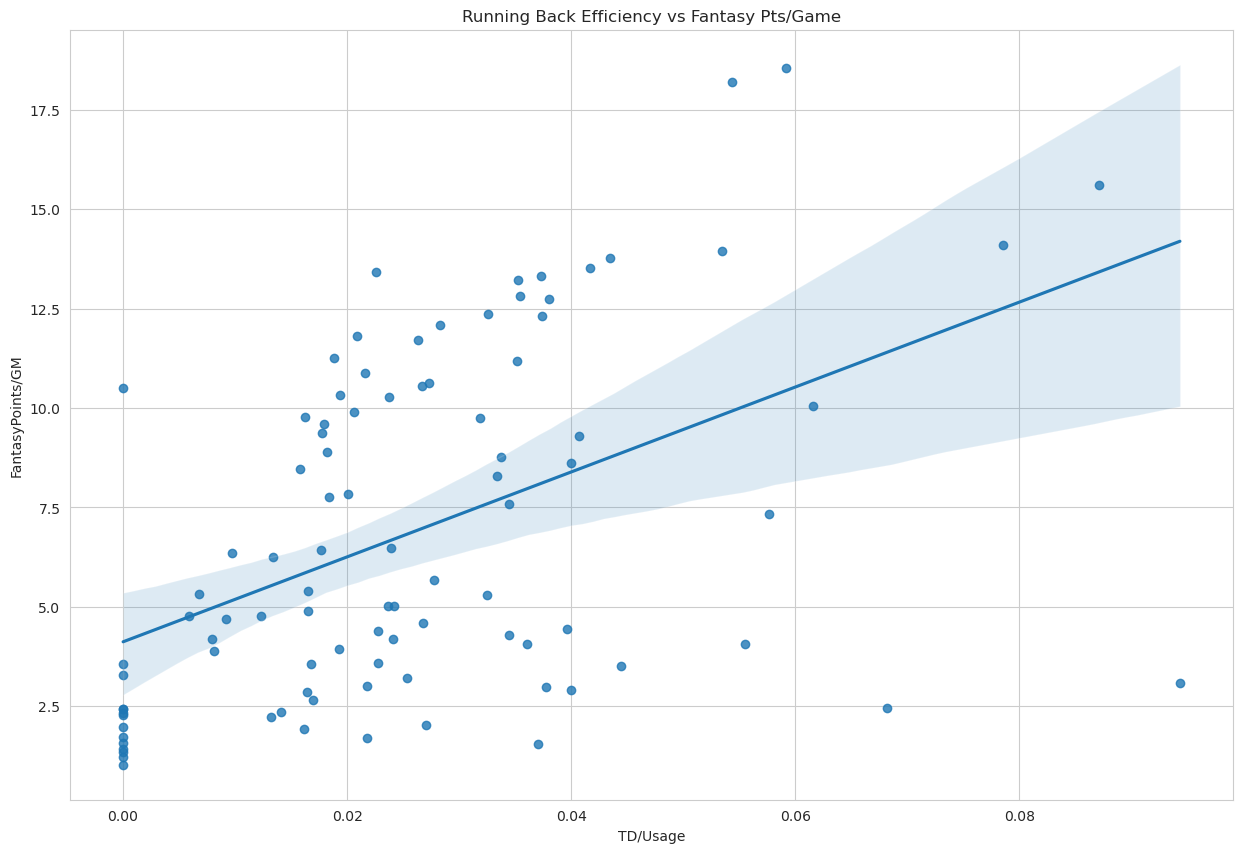

In [54]:
#Using the same sets of running back data, we can also quickly look at if efficiency matters
#A running back's efficiency is measured as the number of touchdowns they score per ball carry

#How does efficiency correlate to fantasy football performance?
rb_df['TD/Usage'] = (rb_df['RushingTD']+ rb_df['ReceivingTD'])/(rb_df['RushingAtt'] + rb_df['Tgt'])
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

rb_df = rb_df[rb_df['RushingAtt'] > 20]
plot = sns.regplot(
x=rb_df['TD/Usage'],
y=rb_df['FantasyPoints/GM'],
scatter=True)

plt.title('Running Back Efficiency vs Fantasy Pts/Game', fontdict=None, loc='center', pad=None)

In [53]:
#As we can see here, the efficiency is hardly as correlated to their fantasy points as usage. 
#Meaning, we want to opt in for a runningback that is getting plenty of touches and is the go to running back on their team
#We do not wan to prioritize a runningback that is getting high touchdowns per carry